In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from Data_pipeline import data_pipeline_url
from Data_pipeline import data_pipeline_api

In [2]:
#Daten einlesen
df_erdbeben = gpd.read_file("erdbeben.json")

In [3]:
print(df_erdbeben.head())

           id   mag                           place           time  \
0  ok2022fsoi  2.14      8 km SSE of Meno, Oklahoma  1648020119195   
1  hv72959742  2.24  16 km S of Fern Forest, Hawaii  1648019829910   
2  nc73709176  0.67      4km NNW of The Geysers, CA  1648019657830   
3  hv72959727  2.27      9 km ENE of Pāhala, Hawaii  1648018848890   
4  hv72959722  2.04       8 km NE of Pāhala, Hawaii  1648018716420   

         updated    tz                                                url  \
0  1648020344741  None  https://earthquake.usgs.gov/earthquakes/eventp...   
1  1648020159470  None  https://earthquake.usgs.gov/earthquakes/eventp...   
2  1648019755019  None  https://earthquake.usgs.gov/earthquakes/eventp...   
3  1648019178220  None  https://earthquake.usgs.gov/earthquakes/eventp...   
4  1648018905350  None  https://earthquake.usgs.gov/earthquakes/eventp...   

                                              detail  felt  cdi  ...  sources  \
0  https://earthquake.usgs.gov/eart

In [4]:
df_erdbeben.isna().sum()

id             0
mag            0
place          0
time           0
updated        0
tz          1994
url            0
detail         0
felt        1818
cdi         1818
mmi         1966
alert       1984
status         0
tsunami        0
sig            0
net            0
code           0
ids            0
sources        0
types          0
nst          480
dmin         633
rms            0
gap          267
magType        0
type           0
title          0
geometry       0
dtype: int64

In [5]:
for i in range(len(df_erdbeben)):
    if df_erdbeben["alert"][i] != None:
        print(df_erdbeben["alert"][i])

green
green
green
green
green
green
yellow
green
orange
green


In [6]:
df_erdbeben.dtypes

id            object
mag          float64
place         object
time           int64
updated        int64
tz            object
url           object
detail        object
felt         float64
cdi          float64
mmi          float64
alert         object
status        object
tsunami        int64
sig            int64
net           object
code          object
ids           object
sources       object
types         object
nst          float64
dmin         float64
rms          float64
gap          float64
magType       object
type          object
title         object
geometry    geometry
dtype: object

In [7]:
df_erdbeben.duplicated().sum()

0

In [8]:
df_erdbeben = df_erdbeben.drop(columns=["url", "detail"])

In [9]:
df_erdbeben_factor = df_erdbeben.astype({"type": "category", "alert": "category", "magType": "category", "sources": "category", "tsunami":"category"})

In [11]:
df_erdbeben_factor.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        1994 non-null   object  
 1   mag       1994 non-null   float64 
 2   place     1994 non-null   object  
 3   time      1994 non-null   int64   
 4   updated   1994 non-null   int64   
 5   tz        0 non-null      object  
 6   felt      176 non-null    float64 
 7   cdi       176 non-null    float64 
 8   mmi       28 non-null     float64 
 9   alert     10 non-null     category
 10  status    1994 non-null   object  
 11  tsunami   1994 non-null   category
 12  sig       1994 non-null   int64   
 13  net       1994 non-null   object  
 14  code      1994 non-null   object  
 15  ids       1994 non-null   object  
 16  sources   1994 non-null   category
 17  types     1994 non-null   object  
 18  nst       1514 non-null   float64 
 19  dmin      1361 non-null   float64 
 20  

In [38]:
df_erdbeben_factor["occured_time"]=0
df_erdbeben_factor["recent_update"]=0
df_erdbeben_factor["depth"]=0

In [39]:
for i in range(len(df_erdbeben_factor)):
    df_erdbeben_factor["occured_time"][i] = datetime.datetime.fromtimestamp(df_erdbeben_factor["time"][i] / 1000).strftime('%d/%m/%y %H:%M:%S')
    df_erdbeben_factor["recent_update"][i] = datetime.datetime.fromtimestamp(df_erdbeben_factor["time"][i] / 1000).strftime('%d/%m/%y %H:%M:%S')
    df_erdbeben_factor["depth"][i] = df_erdbeben_factor["geometry"][i].z

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_4865/2461527041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erdbeben_factor["occured_time"][i] = datetime.datetime.fromtimestamp(df_erdbeben_factor["time"][i] / 1000).strftime('%d/%m/%y %H:%M:%S')
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_4865/2461527041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


In [43]:
df_erdbeben_factor = df_erdbeben_factor.drop(columns=["time", "updated", "title"])

In [44]:
df_erdbeben_factor.describe()

,mag,felt,cdi,mmi,sig,nst,dmin,rms,gap,date,depth
count,1994.000000,176.000000,176.000000,28.000000,1994.000000,1514.000000,1361.000000,1994.000000,1727.000000,1994.0,1994.000000
mean,1.673862,23.289773,2.601705,4.067464,67.695587,20.522457,0.586449,0.253422,122.203205,0.0,19.812939
std,1.238916,111.178986,1.424940,2.169704,103.762679,17.872792,2.253934,0.284587,66.243840,0.0,48.987353
min,-1.360000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,18.000000,0.0,-3.000000
25%,0.850000,1.000000,2.000000,2.781000,11.000000,8.000000,0.017250,0.073050,72.000000,0.0,2.000000
50%,1.465000,2.000000,2.200000,4.008500,33.000000,15.000000,0.054230,0.130000,106.000000,0.0,7.000000
75%,2.120000,5.000000,3.400000,5.571500,70.000000,27.000000,0.155400,0.297500,161.000000,0.0,15.000000
max,7.300000,984.000000,8.600000,8.008000,1301.000000,198.000000,45.917000,2.330000,351.000000,0.0,616.000000


In [40]:
koordinaten_check = gpd.GeoSeries(df_erdbeben_factor["geometry"])

In [41]:
koordinaten_check.is_valid.sum()

1994

In [42]:
#check if mag < 0
invalid_mag = df_erdbeben_factor[df_erdbeben_factor["mag"] < -1]
print(invalid_mag)

              id   mag                           place           time  \
650   av91052298 -1.07    81 km W of Salamatof, Alaska  1647822313540   
1505  uu60486192 -1.36   48 km SSE of Mammoth, Wyoming  1647563366660   
1540  av91515366 -1.09  61 km ENE of Pedro Bay, Alaska  1647553100110   

            updated    tz  felt  cdi  mmi alert  ...  nst     dmin   rms  \
650   1647997623130  None   NaN  NaN  NaN   NaN  ...  4.0      NaN  0.04   
1505  1647617792210  None   NaN  NaN  NaN   NaN  ...  5.0  0.03382  0.06   
1540  1647636633840  None   NaN  NaN  NaN   NaN  ...  4.0      NaN  0.04   

        gap magType        type                                    title  \
650   128.0      ml  earthquake    M -1.1 - 81 km W of Salamatof, Alaska   
1505  163.0      md  earthquake   M -1.4 - 48 km SSE of Mammoth, Wyoming   
1540  129.0      ml  earthquake  M -1.1 - 61 km ENE of Pedro Bay, Alaska   

                                   geometry               date  depth  
650   POINT Z (-152.80850

In [43]:
df_tsunami = df_erdbeben_factor[df_erdbeben_factor["tsunami"] == 1]
print(df_tsunami)

              id  mag                            place           time  \
151   us6000h6nr  6.7  62 km S of Hualien City, Taiwan  1647970898951   
163   us6000h6ne  6.7      northern Mid-Atlantic Ridge  1647966908020   
1917  us6000h519  7.3        57 km ENE of Namie, Japan  1647441393264   

            updated    tz   felt  cdi    mmi   alert  ... nst    dmin   rms  \
151   1648017030478  None  146.0  6.9  7.159   green  ... NaN   0.672  0.90   
163   1647977594913  None    0.0  1.0  0.000   green  ... NaN  10.749  0.76   
1917  1648011980128  None  350.0  8.6  8.008  orange  ... NaN   2.937  1.00   

       gap magType        type                                    title  \
151   35.0     mww  earthquake  M 6.7 - 62 km S of Hualien City, Taiwan   
163   27.0     mww  earthquake      M 6.7 - northern Mid-Atlantic Ridge   
1917  29.0     mww  earthquake        M 7.3 - 57 km ENE of Namie, Japan   

                                   geometry               date  depth  
151   POINT Z (12

<AxesSubplot:>

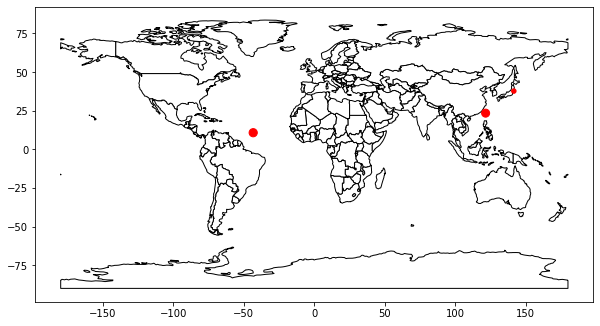

In [44]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
axis = world.plot(figsize=(10,10), color='white', edgecolor='black')

df_tsunami.plot(ax=axis, color="red", markersize=(df_erdbeben_factor["mag"]*30))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa850406580>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa850422310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa8504060a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa850422a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa850422dc0>],
 'means': []}

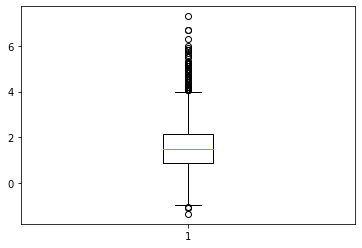

In [45]:
plt.boxplot(x=df_erdbeben_factor["mag"])

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Magnitude')

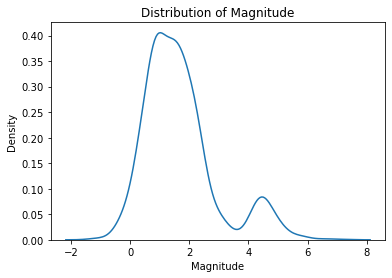

In [46]:
sns.distplot(df_erdbeben_factor["mag"], hist=False)
plt.xlabel("Magnitude")
plt.title("Distribution of Magnitude")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa87397e220>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa87397e940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa873972e50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa8739860a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa873986430>],
 'means': []}

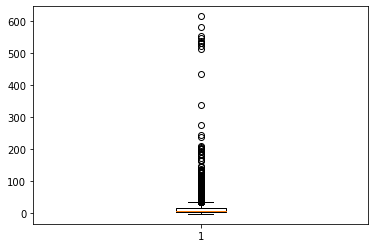

In [47]:
plt.boxplot(x=df_erdbeben_factor["depth"])

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of depth')

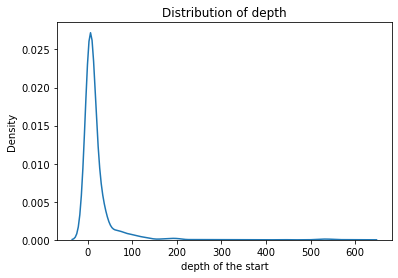

In [48]:
sns.distplot(df_erdbeben_factor["depth"], hist=False)
plt.xlabel("depth of the start")
plt.title("Distribution of depth")

In [49]:
df_erdbeben_factor["color"] = 0
for i in range(len(df_erdbeben_factor)):
    if df_erdbeben_factor["mag"][i] > 5:
        df_erdbeben_factor["color"][i] = "red"
    elif df_erdbeben_factor["mag"][i] > 3:
        df_erdbeben_factor["color"][i] = "orange"
    elif df_erdbeben_factor["mag"][i] > 1:
        df_erdbeben_factor["color"][i] = "yellow"
    else:
        df_erdbeben_factor["color"][i] = "green"

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1150/2877286564.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erdbeben_factor["color"][i] = "yellow"
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


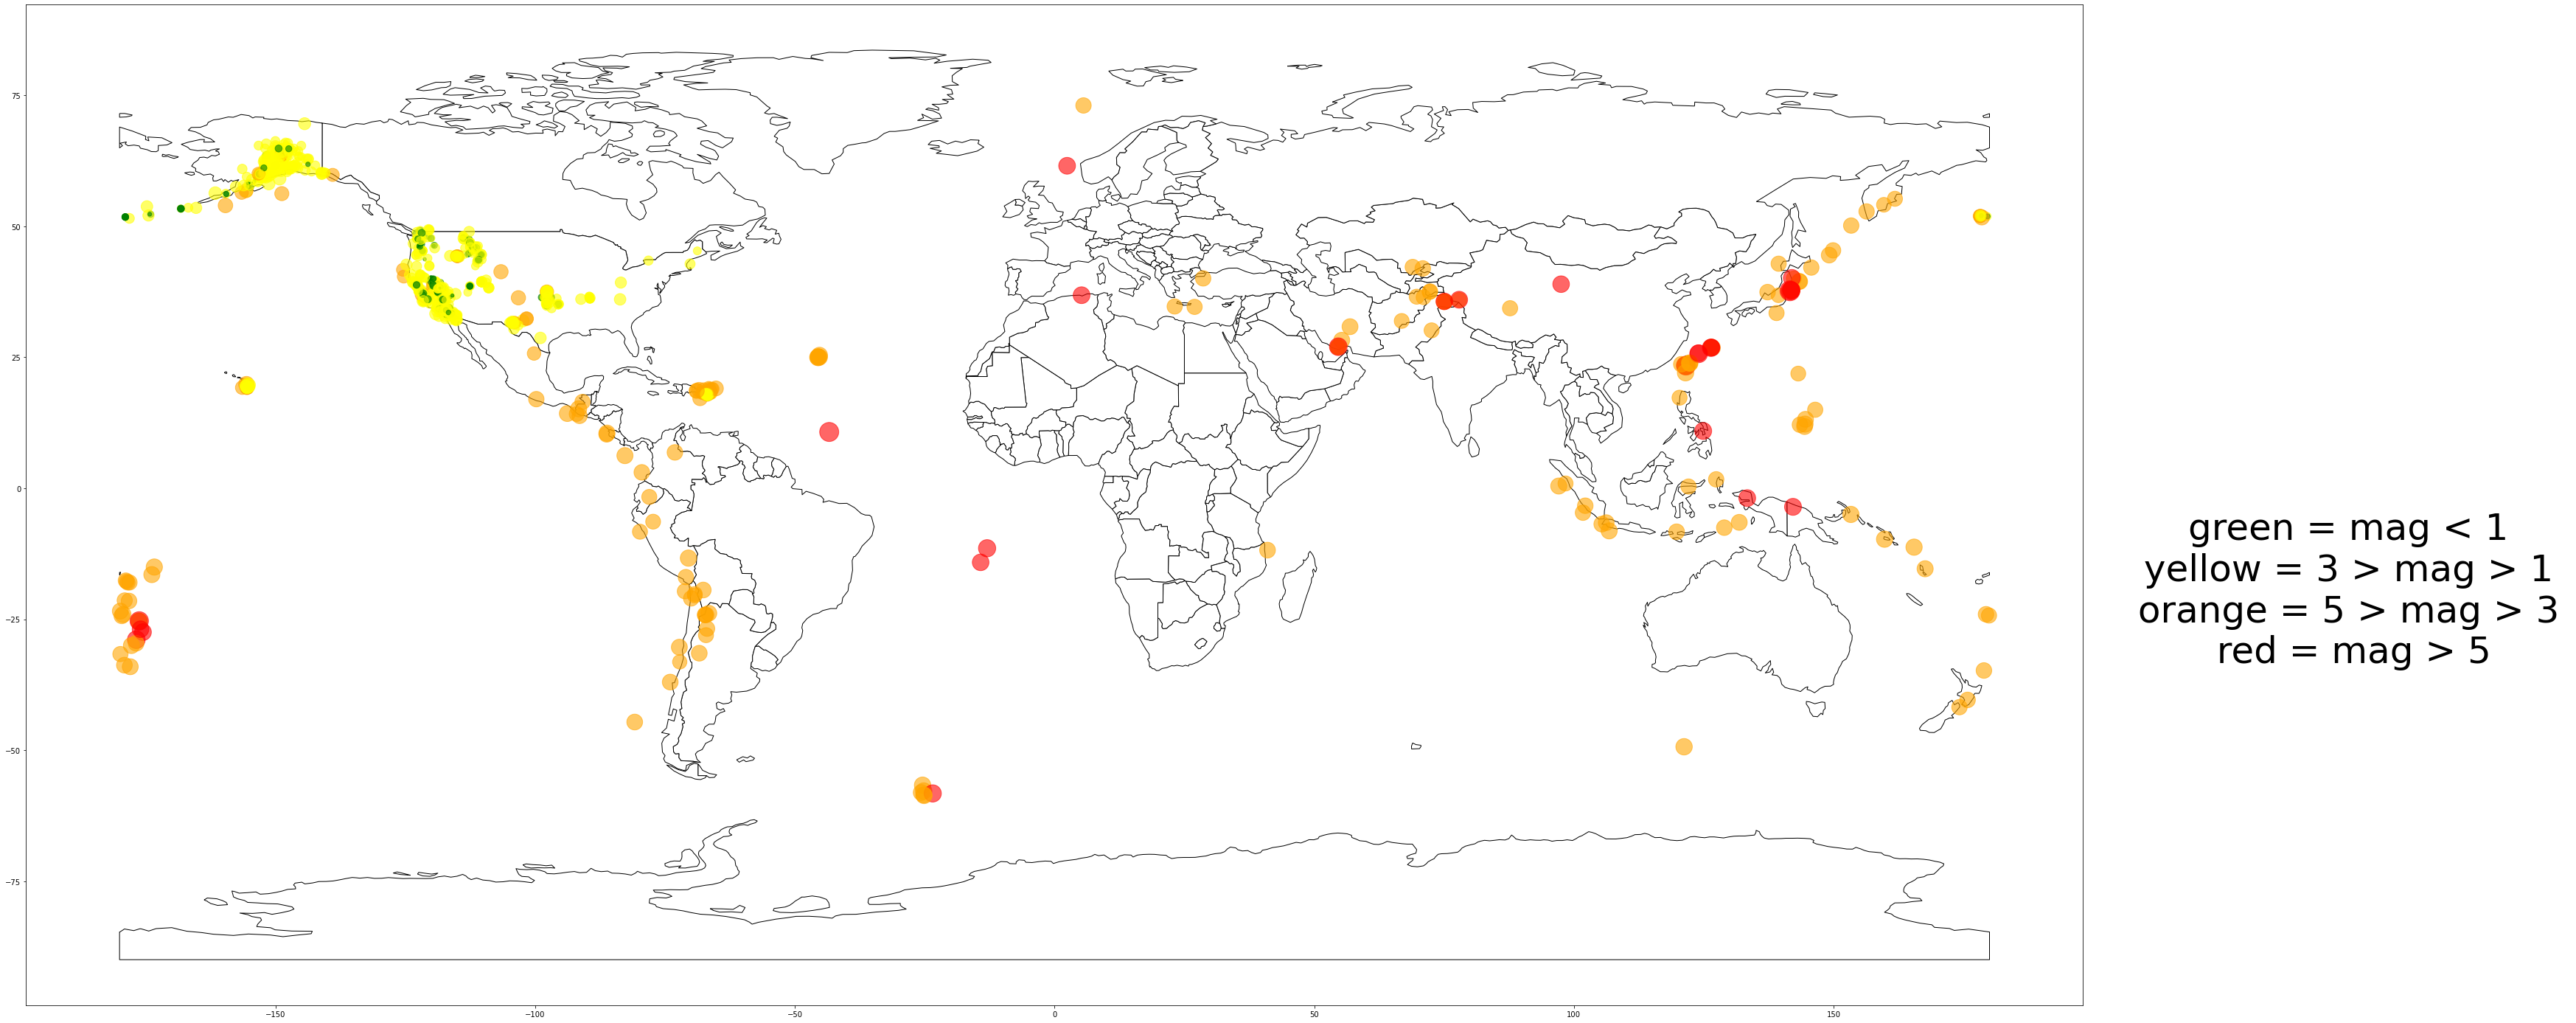

In [54]:
#Import world map from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
axis = world.plot(figsize=(50,50), color='white', edgecolor='black')

df_erdbeben_factor.plot(ax=axis, color=df_erdbeben_factor["color"], markersize=(df_erdbeben_factor["mag"]*100), alpha=0.6)
plt.suptitle("green = mag < 1\n yellow = 3 > mag > 1 \n orange = 5 > mag > 3 \n red = mag > 5", x=1, y=0.5, fontsize=50)
plt.show()

/Users/janisfrolich/PycharmProjects/daw/Erdbeben/Data_pipeline.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for i in range(len(df)):
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/janisfrolich/PycharmProjects/daw/Erdbeben/Data_pipeline.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

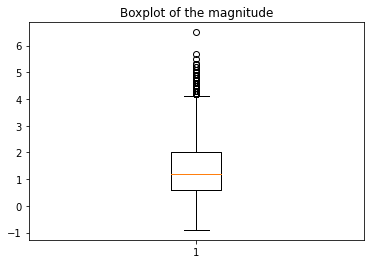

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


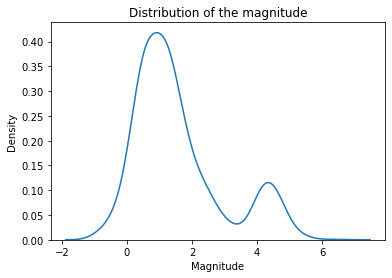

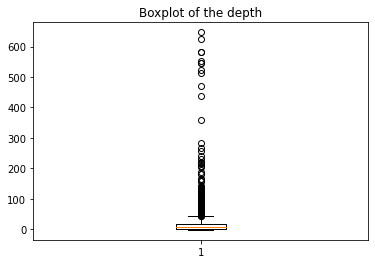

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


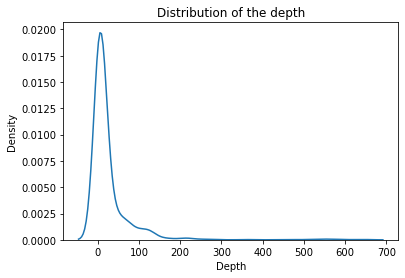

/Users/janisfrolich/PycharmProjects/daw/Erdbeben/Data_pipeline.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for i in range(len(df)):
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


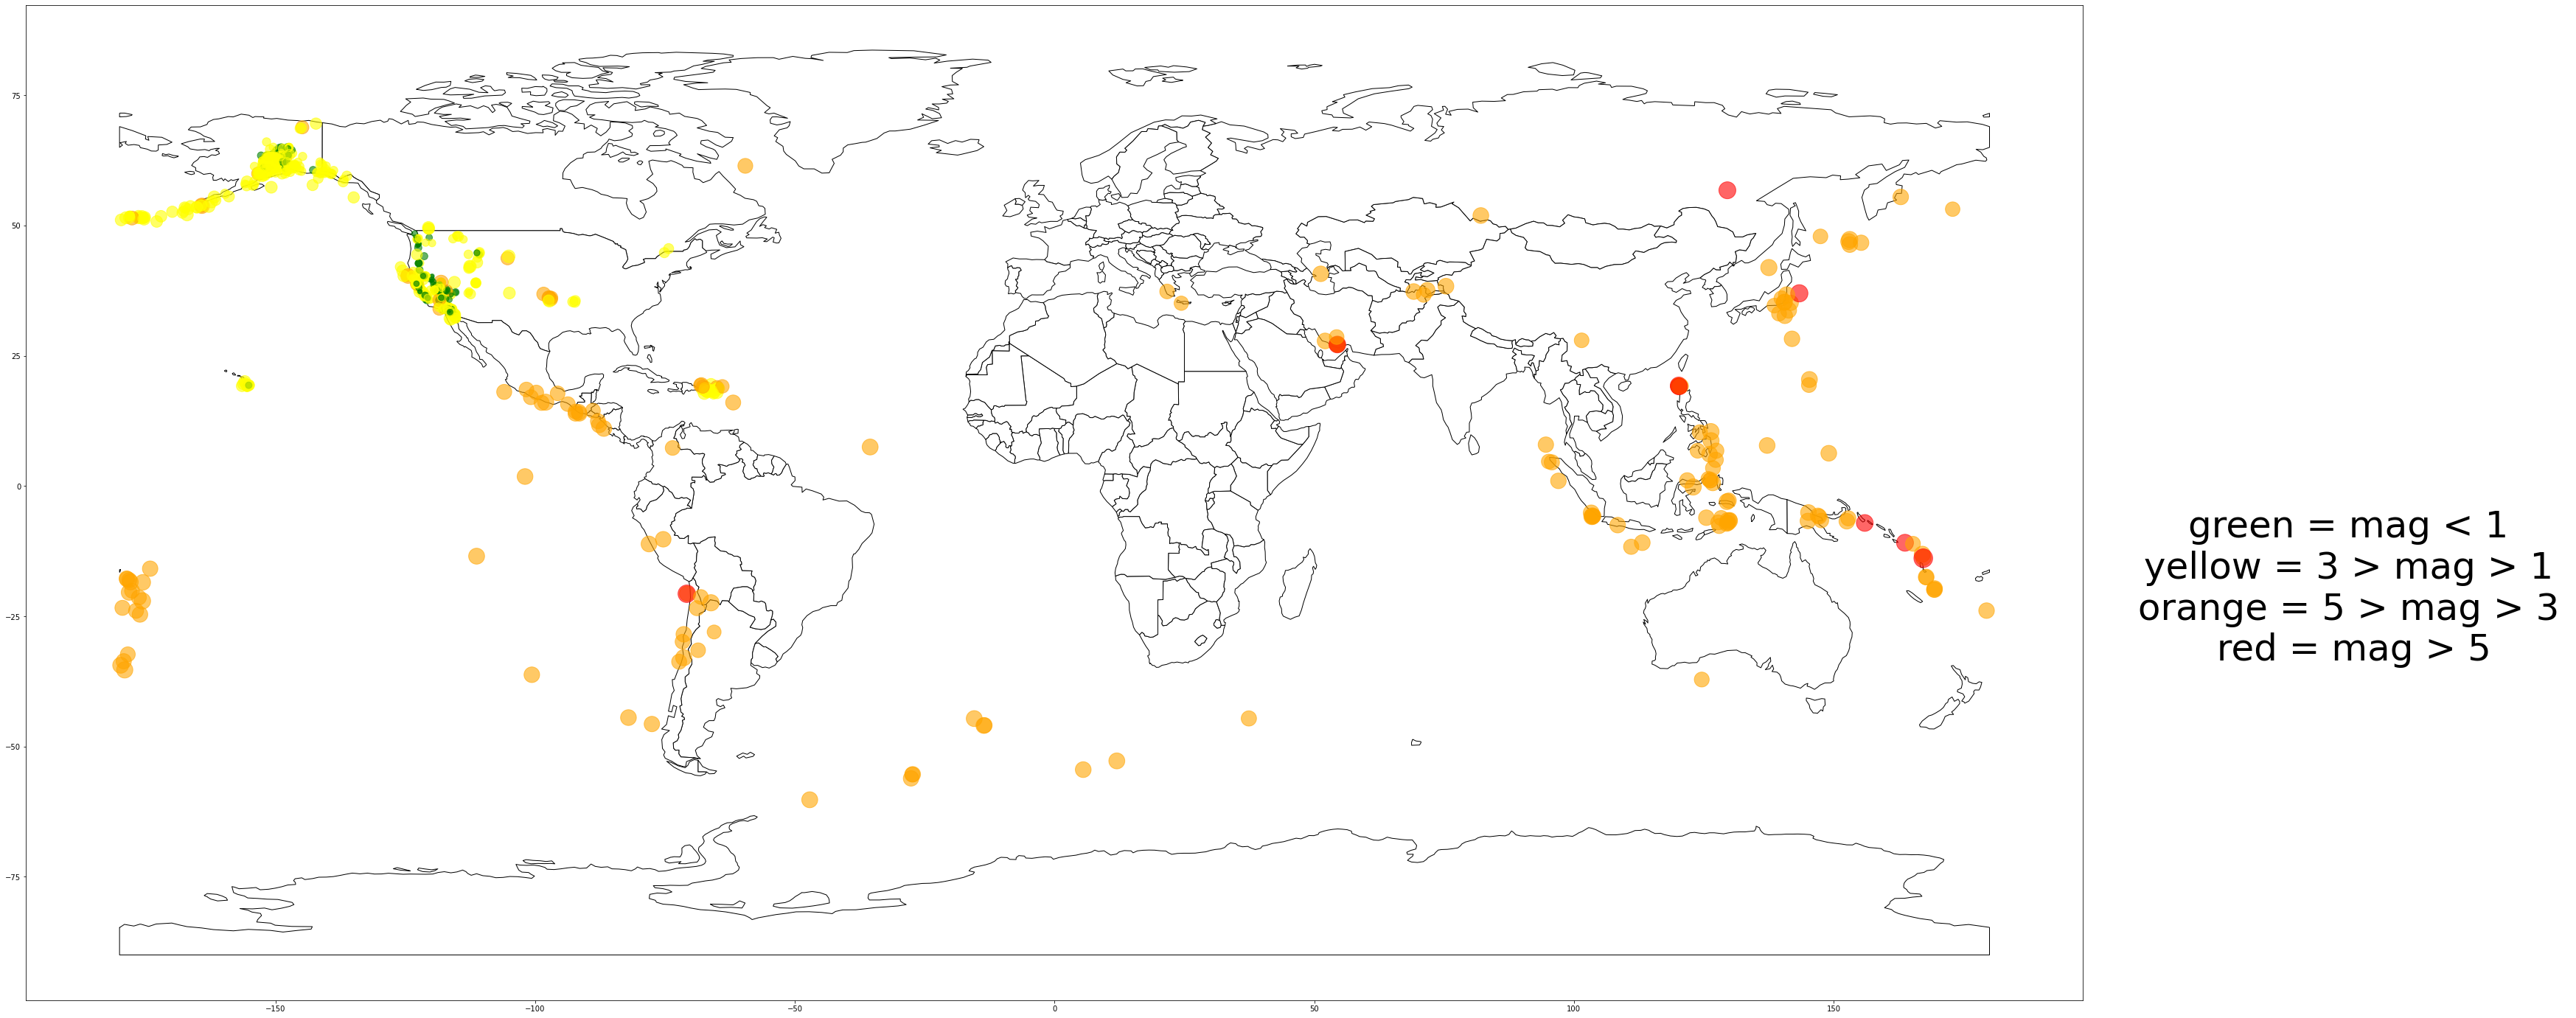

,id,mag,place,time,updated,tz,felt,cdi,mmi,alert,...,gap,magType,type,title,geometry,date,depth,lat,lon,color
0,ci11410154,1.22,"21km N of Yucca Valley, CA",1388879738630,1457682080851,None,NaN,NaN,NaN,NaN,...,145.0,ml,earthquake,"M 1.2 - 21km N of Yucca Valley, CA",POINT Z (-116.44733 34.30567 9.46700),05/01/14 00:55:38,9,34,-116,yellow
1,nn00433340,-0.30,"44 km ESE of Beatty, Nevada",1388879532033,1530313193785,None,NaN,NaN,NaN,NaN,...,123.4,ml,earthquake,"M -0.3 - 44 km ESE of Beatty, Nevada",POINT Z (-116.31110 36.72850 6.80000),05/01/14 00:52:12,6,36,-116,green
2,nc72136246,1.39,"6 km W of Cobb, California",1388879372380,1486065145584,None,NaN,NaN,NaN,NaN,...,63.0,md,earthquake,"M 1.4 - 6 km W of Cobb, California",POINT Z (-122.79533 38.81283 1.10000),05/01/14 00:49:32,1,38,-122,yellow
3,nc72136241,1.16,"21 km ENE of Swall Meadows, California",1388878568930,1530313194512,None,NaN,NaN,NaN,NaN,...,71.0,md,earthquake,"M 1.2 - 21 km ENE of Swall Meadows, California",POINT Z (-118.43150 37.60350 6.81600),05/01/14 00:36:08,6,37,-118,yellow
4,usc000lx1g,3.70,"5 km ESE of Orlando, Oklahoma",1388878412000,1584656697499,None,24.0,4.3,4.14,NaN,...,NaN,mb_lg,earthquake,"M 3.7 - 5 km ESE of Orlando, Oklahoma",POINT Z (-97.32200 36.12900 5.00000),05/01/14 00:33:32,5,36,-97,orange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,ak0141nol21,2.00,"69 km ENE of Pedro Bay, Alaska",1388535883771,1558392307098,None,NaN,NaN,NaN,NaN,...,NaN,ml,earthquake,"M 2.0 - 69 km ENE of Pedro Bay, Alaska",POINT Z (-153.01850 60.08720 105.80000),01/01/14 01:24:43,105,60,-153,yellow
1279,nc72133841,0.57,"10 km W of Cobb, California",1388535010970,1486062277926,None,NaN,NaN,NaN,NaN,...,65.0,md,earthquake,"M 0.6 - 10 km W of Cobb, California",POINT Z (-122.84350 38.82167 2.14000),01/01/14 01:10:10,2,38,-122,green
1280,uw60664271,2.20,"1 km NW of Sweet Home, Oregon",1388534755060,1469215315190,None,NaN,NaN,NaN,NaN,...,179.0,md,explosion,"M 2.2 Explosion - 1 km NW of Sweet Home, Oregon",POINT Z (-122.74983 44.40800 -0.34800),01/01/14 01:05:55,0,44,-122,yellow
1281,usc000lv5j,4.50,"163 km W of Neiafu, Tonga",1388534728830,1394151953000,None,NaN,NaN,NaN,NaN,...,41.0,mb,earthquake,"M 4.5 - 163 km W of Neiafu, Tonga",POINT Z (-175.52820 -18.49650 217.90000),01/01/14 01:05:28,217,-18,-175,orange


In [45]:
data_pipeline_api("2014-01-01", "2014-01-05")